# E-Commerce: Product Range Analysis (Final Project)

___Link to Presentation:___

https://drive.google.com/file/d/1cHhMV6rahyG45cHKMeLkjXifFHUKlXNB/view

## Project Decomposition

**Main goal:**

We aim to analyze the product range in the e-commerce store, examining the diversity of available products, their pricing, popularity, categories, market trends, customer behavior, and product relationships. Our objective is to make data-driven decisions regarding the store's product assortment, pricing strategy, and further business developments.

### Decomposition Plan:

**Setting the appropriate environment**

Importing libraries (pandas, numpy, seaborn, matplotlib, timedelta, scipy, math)

**Data download**

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

The dataset contains the transaction history of an online store that sells household goods.

**Data Preprocessing:**

- Convert the data to the appropriate types, such as datetime, to ensure accurate analysis.
- Check for missing values, carefully study them, and make decisions on whether to eliminate or replace them.
- Check for duplicates, thoroughly examine them, and remove any redundant entries.
- Examine the presence of negative date values, if any, and determine their quantity and nature.
- Determine whether non-numerical data requires categorization and add necessary columns.

**EDA - Product Range Analysis:**

- Study and visualize the timeframe of the given data to understand the data distribution and patterns.
- Identify and handle any abnormal data values by either removing or replacing them.
- Analyse categories.
- Analyse product sale trends.
- Analyze customer behavior, such as frequent buyers or those with large order sizes.

**Statistical Data Analysis:**

- Formulate hypotheses (H0 and H1) based on the research questions and objectives.
- Prepare data samples and perform statistical tests to evaluate the hypotheses.
- Interpret the results and make conclusions based on the findings.

**Visualization:**

- Create a PowerPoint presentation to effectively communicate the findings and analysis.
- Recommendations to the E-commerce Store for Product Range Improvements.
- Provide actionable recommendations to the e-commerce store based on the analysis conducted.
- Suggest strategies for enhancing the product range, optimizing pricing, and driving future business developments.

___List of Sources:___

1. Official documentation of relevant libraries and tools, such as Pandas, NumPy, Matplotlib, Seaborn, etc.
2. Google search - insights from open-source data and studies related to analogous e-commerce stores.
3. Resources and examples available on the Practicum online learning platform.
4. Online forums like Stack Overflow and W3Schools to seek guidance and solutions from the data analysis community.
5. Jupyter notebook archive (my previous projects with similar tasks and problem solving techniques).

## Importing Libraries

In [81]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy import stats as st
import math as mth
import re

# Disabling warning messages
import warnings
warnings.filterwarnings('ignore')

## Data Download 

In [82]:
# Downloading dataframe
try: 
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep ="\t", parse_dates = ['InvoiceDate'])

except FileNotFoundError:
    print("File not found. Please provide the correct file path.")
except pd.errors.ParserError:
    print("Error while parsing the CSV file. Check the file format and data.")
except Exception as e:
    print("An unexpected error occurred:", str(e))

## Data Preprocessing

In [83]:
# Custom function for data preprocessing 
def df_prep(dataframe: pd.core.frame.DataFrame, title: str):
    processed_data = {}
    processed_data['Title'] = title

    # Random sample of the data
    processed_data['Random Sample'] = dataframe.sample(5)

    # Basic information
    processed_data['Data Info'] = dataframe.info(memory_usage='deep')

    # Descriptive statistics
    numerical_stats = dataframe.describe().T
    categorical_stats = dataframe.describe(include='object').T
    processed_data['Numerical Statistics'] = numerical_stats
    processed_data['Categorical Statistics'] = categorical_stats

    # Missing values analysis
    missing_values = dataframe.isnull().sum()
    missing_percentage = dataframe.isnull().mean() * 100
    missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
    processed_data['Missing Values'] = missing_data

    # Duplicates basic info
    duplicated_values_number = dataframe.duplicated().sum()
    processed_data['Duplicated Values Number'] = duplicated_values_number
    

    # Unique values and null values analysis
    columns_info = []
    for column in dataframe.columns:
        column_info = {
            'Column Name': column,
            'Unique Values': dataframe[column].unique(),
            'Null Values Count': dataframe[column].isnull().sum(),
            'Null Values Ratio': round(dataframe[column].isnull().mean() * 100, 3),
            'Null Values Rows': dataframe[dataframe[column].isnull()]
        }
        columns_info.append(column_info)
    processed_data['Columns Info'] = columns_info

    return processed_data


In [84]:
# Calling preprocessing function
processed_data = df_prep(df, "Data Preprocessing")

# Accessing and displaying random sample
print("Random Sample:")
display(processed_data['Random Sample'])
print('----------------------------------')

# Accessing and displaying data info
print("Data Info:")
display(processed_data['Data Info'])
print('----------------------------------')

# Accessing and displaying numerical statistics
print("Numerical Statistics:")
display(processed_data['Numerical Statistics'])
print('----------------------------------')

# Accessing and displaying categorical statistics
print("Categorical Statistics:")
display(processed_data['Categorical Statistics'])
print('----------------------------------')

# Accessing and displaying missing values analysis
print("Missing Values:")
display(processed_data['Missing Values'])
print('----------------------------------')

# Accessing and displaying duplicated values basic analysis
print("Duplicated Values:")
display(processed_data['Duplicated Values Number'])
print('----------------------------------')

# Accessing and displaying columns information
print("Columns Info:")
for column_info in processed_data['Columns Info']:
    print(f"Column Name: {column_info['Column Name']}")
    print("Unique Values:")
    display(column_info['Unique Values'])
    print(f"Null Values Count: {column_info['Null Values Count']}")
    print(f"Null Values Ratio: {column_info['Null Values Ratio']}%")
    print("Null Values Rows:")
    display(column_info['Null Values Rows'])
    print('-------------------------------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.3 MB
Random Sample:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
292447,562553,22585,PACK OF 6 BIRDY GIFT TAGS,1,2019-08-03 16:34:00,2.46,NaN
403282,571559,23202,JUMBO BAG VINTAGE LEAF,10,2019-10-16 09:32:00,2.08,14911.0
504641,578977,22158,3 HEARTS HANGING DECORATION RUSTIC,2,2019-11-25 15:18:00,2.95,17231.0
241623,558237,23237,SET OF 4 KNICK KNACK TINS LEAVES,6,2019-06-25 15:04:00,4.15,12867.0
62419,541497,22178,VICTORIAN GLASS HANGING T-LIGHT,24,2019-01-16 15:19:00,2.46,NaN


----------------------------------
Data Info:


None

----------------------------------
Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


----------------------------------
Categorical Statistics:


,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369


----------------------------------
Missing Values:


,Missing Count,Missing Percentage
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694


----------------------------------
Duplicated Values:


5268

----------------------------------
Columns Info:
Column Name: InvoiceNo
Unique Values:


array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

Null Values Count: 0
Null Values Ratio: 0.0%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


-------------------------------
Column Name: StockCode
Unique Values:


array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

Null Values Count: 0
Null Values Ratio: 0.0%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


-------------------------------
Column Name: Description
Unique Values:


array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

Null Values Count: 1454
Null Values Ratio: 0.268%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


-------------------------------
Column Name: Quantity
Unique Values:


array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

Null Values Count: 0
Null Values Ratio: 0.0%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


-------------------------------
Column Name: InvoiceDate
Unique Values:


array(['2018-11-29T08:26:00.000000000', '2018-11-29T08:28:00.000000000',
       '2018-11-29T08:34:00.000000000', ...,
       '2019-12-07T12:31:00.000000000', '2019-12-07T12:49:00.000000000',
       '2019-12-07T12:50:00.000000000'], dtype='datetime64[ns]')

Null Values Count: 0
Null Values Ratio: 0.0%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


-------------------------------
Column Name: UnitPrice
Unique Values:


array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

Null Values Count: 0
Null Values Ratio: 0.0%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


-------------------------------
Column Name: CustomerID
Unique Values:


array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

Null Values Count: 135080
Null Values Ratio: 24.927%
Null Values Rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


-------------------------------


***Data observations***

Data preprocessing revealed the following information about our dataframe:

- Column names must be __renamed__ for further usage convenience.
- The `Description` column values must be __converted__ to lowercase.
- The `CustomerID` column is currently represented as float64 type and can be __converted__ to int64.
- The `Quantity` and `UnitPrice` columns have __negative values__, which require further investigation to understand the reasons behind these negative values.
- The `Description` column contains __1454 missing values__, which account for 0.27% of the data. It is important to evaluate the general usefulness of this data and determine the impact of these missing values.
- The `CustomerID` column contains __135080 missing values__, which represents 24.9% of the data. Similar to the `Description` column, we need to assess the general usefulness of this data and understand the implications of the missing values.
- __Numerical Statistics:__ The Quantity and UnitPrice columns exhibit a significant right-skew in their data distribution. This indicates that there are a few instances with __very high quantities or prices__ compared to the majority of the data.
- __Categorical Statistics:__ The most popular item in terms of sales is "WHITE HANGING HEART T-LIGHT HOLDER," with a total of 4223 items sold.
- The data contains 5268 __duplicated entries,__ which requires additional investigation to determine the reasons behind these duplications and assess their impact on the analysis.


### Duplicates

In [85]:
# Custom function for identification of duplicates
def df_duplicates(df):
    duplicates = df[df.duplicated()] # identifying duplicates and stores in the variable
    duplicates_count = len(duplicates) # counting duplicates and stores in the variable
    duplicates_ratio = round(duplicates_count * 100 / len(df), 2) # calculating duplicates ratio

    if duplicates_count > 0:
        print(f"Number of duplicated rows: {duplicates_count}") # displaying duplicates number
        print(f"Duplicated rows ratio: {duplicates_ratio}%") # displaying duplicates ratio
        display(duplicates) # displaying dataframe of duplicates only
    else:
        print("No duplicates found.")

# Usage:
df_duplicates(df)

Number of duplicated rows: 5268
Duplicated rows ratio: 0.97%


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


In [86]:
# Searching for duplicate patterns within the InvoiceDate data
duplicate_rows = df[df.duplicated(subset=['InvoiceDate'])]
if not duplicate_rows.empty:
    display(duplicate_rows)
else:
    print("No duplicates based on multiple columns found.")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0


In [87]:
# Searching for duplicate patterns through diffrent columns
duplicate_rows = df[df.duplicated(subset=['InvoiceNo', 'StockCode', 'Description', 'CustomerID'])]
if not duplicate_rows.empty:
    display(duplicate_rows)
else:
    print("No duplicates based on multiple columns found.")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
125,536381,71270,PHOTO CLIP LINE,3,2018-11-29 09:41:00,1.25,15311.0
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2018-11-29 11:45:00,6.35,17908.0
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2018-11-29 11:45:00,2.10,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2018-11-29 11:45:00,6.35,17908.0
...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2019-12-07 11:34:00,0.65,14446.0
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2019-12-07 11:34:00,5.45,14446.0
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


In [88]:
# Searching for duplicate patterns in random sample
duplicate_rows.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
475351,576879,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2019-11-14 16:52:00,4.25,18006.0
331582,566019,22904,CALENDAR PAPER CUT DESIGN,4,2019-09-06 12:44:00,2.95,17243.0
144603,548768,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2019-04-02 12:34:00,3.25,17886.0
376523,569524,22979,PANTRY WASHING UP BRUSH,1,2019-10-02 14:42:00,1.45,14506.0
334794,566269,22035,VINTAGE CARAVAN GREETING CARD,12,2019-09-09 13:39:00,0.42,17864.0
424372,573264,23581,JUMBO BAG PAISLEY PARK,6,2019-10-26 12:36:00,2.08,14415.0
244528,558535,23054,RECYCLED ACAPULCO MAT LAVENDER,2,2019-06-28 12:04:00,8.25,16904.0
534845,581173,75049L,LARGE CIRCULAR MIRROR MOBILE,6,2019-12-05 15:07:00,1.25,17870.0
194591,553657,22384,LUNCH BAG PINK POLKADOT,1,2019-05-16 11:28:00,1.65,14583.0
413305,572309,22163,HEART STRING MEMO HOLDER HANGING,5,2019-10-21 15:29:00,0.79,14432.0


- We have identified 5,268 (less than 1%) duplicated rows in our dataset.
- We have thoroughly examined possible patterns associated with particular dates and/or other columns, but we found that the duplicates are randomly distributed throughout the dataset.
- Having identical rows can introduce errors and distort the accuracy of calculations and analysis, potentially leading to misleading insights if not handled properly.
- Considering the relatively low volume of duplicates and their random distribution, it is efficient and appropriate to delete them from the dataset.
- By eliminating the duplicates, we expect to improve the overall quality and cleanliness of the dataset, ensuring that each observation is unique and contributes meaningfully to the analysis.





### Missing values

#### Description

In [89]:
# Isolating missing values of 'Description' column
missing_description = df[df['Description'].isnull()]
missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


In [90]:
# Displaying persentage of missing values by columns
missing_description_percentage = df['Description'].isnull().mean() * 100
display(missing_description_percentage)

0.2683107311375157

In [91]:
# Grouping 'Description'  with 'InvoiceDate' to calculate missing values by dates
missing_descriptions_by_date = df.groupby(
    'InvoiceDate')['Description'].apply(lambda x: x.isnull().sum()).reset_index(
    name='MissingCount').sort_values(by='MissingCount', ascending=False)
missing_descriptions_by_date.head(10)

,InvoiceDate,MissingCount
6735,2019-04-06 15:06:00,5
3000,2019-01-26 14:52:00,5
895,2018-12-07 15:56:00,5
896,2018-12-07 15:57:00,5
897,2018-12-07 15:58:00,4
14816,2019-08-29 12:43:00,4
5671,2019-03-21 15:06:00,4
12453,2019-07-16 14:19:00,4
6546,2019-04-04 15:26:00,4
3001,2019-01-26 14:53:00,4


- We have observed 0.26% of missing values in the `Description` column.
- We've inspected destribution of missing values by date and found maximun 5 missing descriptions per day and their destribution is completely random.
- The project aims to analyze products, and the `Description` column provides crucial information about the products. 
- Without a description, it becomes challenging to categorize, classify, or interpret the products accurately.
- By removing rows with __NaN__ in the `Description` column, we can ensure that the dataset contains meaningful and complete product information, enabling more accurate analysis and interpretation of the products in the project.


#### Customer ID

In [92]:
# Isolating missing values of 'CustomerId' column
missing_customer = df[df['CustomerID'].isnull()]
missing_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


In [93]:
# Displaying persentage of missing values by columns
missing_customer_percentage = df['CustomerID'].isnull().mean() * 100
display(missing_customer_percentage)

24.926694334288598

- We have observed ~25% of the missing values in `CustomerID` column.
- Deleting over 24% of the rows with missing `CustomerID` values would result in significant data loss. Retaining as much data as possible is desirable for comprehensive analysis.
- Given the considerations mentioned above, it is proposed to replace the missing values in the `CustomerID` column with __'0'__. 
- The value __'0'__ can be used as a representation of unknown or missing `CustomerIDs`, ensuring consistency in the dataset and enabling meaningful analysis.
- In addition, it would be meaningfull to have `CustomerID` values in 'int64' datatype

In [94]:
# Custom function for cleaning data
def df_clean(df):
    # Droping duplicates
    df = df.drop_duplicates()

    # Deleting rows with missing values in 'Description' column
    df = df.dropna(subset=['Description'])

    # Replacing missing values in 'CustomerID' column with '0' and converting all values into 'int64' datatype
    df['CustomerID'] = df['CustomerID'].fillna(0).astype('int64')

    return df

In [95]:
# Running cleaning function
df = df_clean(df)

# Displaying cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.7+ MB


### Columns

#### Rename columns

In [96]:
# Renaming df columns 
new_column_names = {
    'InvoiceNo': 'invoice_no',
    'StockCode': 'stock_code',
    'Description': 'description',
    'Quantity': 'quantity',
    'InvoiceDate': 'invoice_date',
    'UnitPrice': 'unit_price',
    'CustomerID': 'customer_id'
}

df.rename(columns=new_column_names, inplace=True)

In [97]:
# Displaying the result
df.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
99918,544792,22727,ALARM CLOCK BAKELIKE RED,8,2019-02-21 12:37:00,3.75,18172


### Negative and '0' values

In [98]:
# Isolating negative values in 'unit_price'
df_negative_price = df.query('unit_price < 0')
df_negative_price

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,0
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,0


In [99]:
# Isolating nagative values 
df_negative = df[(df['quantity'] < 0) | (df['unit_price'] < 0)]
display(df_negative)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315


In [100]:
# Studing negative 'quantity' values grouped with 'invoice_no' and 'invoice_date'
df_negative[df_negative['quantity'] < 0].groupby(['invoice_no', 'invoice_date']).size().sort_values(ascending=False).to_frame()

,,0
invoice_no,invoice_date,
C570867,2019-10-10 16:17:00,101
C560540,2019-07-17 12:26:00,57
C548460,2019-03-29 11:58:00,45
C560855,2019-07-19 13:00:00,40
C570828,2019-10-10 13:15:00,39
...,...,...
C549051,2019-04-04 10:17:00,1
C549098,2019-04-04 11:06:00,1
C549191,2019-04-05 10:15:00,1


- While grouping negative values in `quantity` with `invoice_no` it is noticed that invoice numbers have letter __'C'__ in the beginning. The equiry with Team Lead revieled that these are __canceled orders__, which makes sence for negative quantities.

In [101]:
# Studing negative 'quantity' values grouped with 'unit_price' and 'stock_code'
df_negative[df_negative['quantity'] < 0].groupby(['unit_price', 'stock_code']).size().sort_values(ascending=False).to_frame()

0
unit_price stock_code     
12.75      22423       103
10.95      22423        77
4.25       22960        70
4.95       22720        69
2.95       22699        49
...                    ...
1.25       84800S        1
           84828         1
           85034A        1
           85036A        1
38970.00   M             1

[3512 rows x 1 columns]

In [102]:
# Studing negative 'quantity' values grouped with 'unit_price' and 'description'
df_negative[df_negative['quantity'] < 0].groupby(['unit_price', 'description']).size().sort_values(ascending=False).to_frame()

,,0
unit_price,description,
0.00,check,120
12.75,REGENCY CAKESTAND 3 TIER,103
10.95,REGENCY CAKESTAND 3 TIER,77
4.25,JAM MAKING SET WITH JARS,70
4.95,SET OF 3 CAKE TINS PANTRY DESIGN,69
...,...,...
1.74,JUMBO BAG PINK POLKADOT,1
1.72,POSTAGE,1
1.69,WHITE ALLIUM ARTIFICIAL FLOWER,1


__Negative values staudy and Observations__

1. When sorting the data by `unit_price` < 0, we identified __2__ rows in the `df_negative` dataset with the description __"Adjust bad debt."__ These entries, registered on 2019-08-10, indicate, probably, an adjustment related to debt reconciliation, which is a normal practice in e-store accounting procedures.

2. By slicing the dataset based on the conditions `quantity` < 0 or `unit_price` < 0, we further analyzed the occurrences of negative amounts in invoices. The largest number of invoices with negative amounts is 101 in total, was recorded for invoice number __C570867 on 2019-10-10__. Additionally, the highest count of negative values (180 occurrences) was associated with the product having stock_code __22423__ and a price of __12.75__. Notably, the description associated with the highest negative quantity count (120 occurrences) and a price of 0.00 was labeled as __"check."__ Besides, we observed an unusually high unit price of __38,970.00__ under the description __"Manual."__

Based on our research, it is challenging to identify a specific pattern or cause for the presence of negative values in the dataset. While we discovered some notable findings, it remains problematic to formulate exact reasons for the negative values presence. They could potentially be a result of various factors, such as human error during data entry, corrupt data or some technical issue.

At EDA stage, we probably should avoid including negative values into revenue-related analyses or other metrics calculations. 

In [103]:
# Displaying total number of negative values in 'quantity' column
df_negative[df_negative['quantity'] < 0].value_counts().sum()

9725

In [104]:
# Calculating  percentage of negative values in 'quantity' column
negative_percentage = (df[df['quantity'] < 0].shape[0] / df.shape[0]) * 100
print(f"Percentage of negative values in 'quantity' column: {negative_percentage:.2f}%")

Percentage of negative values in 'quantity' column: 1.82%


In [105]:
# Displaying total number of negative values in 'unit_price' column
df_negative[df_negative['unit_price'] < 0].value_counts().sum()

2

In [106]:
# Display zero values in 'unit_price' column
zero_price = df[df['unit_price'] == 0]['description'].value_counts().head(10)
zero_price

check                            159
?                                 47
damages                           45
damaged                           43
found                             25
sold as set on dotcom             20
adjustment                        16
Damaged                           14
Unsaleable, destroyed.             9
FRENCH BLUE METAL DOOR SIGN 1      9
Name: description, dtype: int64

In [107]:
# Calculate zero values in 'unit_price' column
zero_price_count = (df['unit_price'] == 0).sum()
total_rows = len(df)
zero_price_percentage = (zero_price_count / total_rows) * 100
print("Percentage of zero values in 'unit_price' column:", zero_price_percentage)


Percentage of zero values in 'unit_price' column: 0.19731420979956538


- Based on the brief analysis, it has been determined that the percentage of zero values in the `unit_price` column is ~0.2%.  - These zero values primarily represent damaged and untested goods. 
- To ensure that these values do not significantly impact the average value calculation, it is recommended to remove this data from the dataset.

In [108]:
# Excluding rows with negative values from dataset 
def remove_negative_values(df):
    df = df[(df['quantity'] > 0) & (df['unit_price'] > 0)].copy()
    return df

In [109]:
df_cleaned = remove_negative_values(df)

In [110]:
# Displaying result for 'quantity' column
df_cleaned[df_cleaned['quantity'] <= 0].value_counts().sum()

0

In [111]:
# Displaying result for 'unit_price' column
df_cleaned[df_cleaned['unit_price'] <= 0].value_counts().sum()

0

- We have excluded rows with negative values from the dataset, loosing ~1.8% of data.
- It was necessary due to potentially analysis bias and skewness of the results, to ensure the accuracy and reliability of the conclusions. 

### Data enrich

#### Total order

In [112]:
# Adding column with total order price
df_cleaned['order_total'] = df_cleaned['quantity'] * df_cleaned['unit_price']
df_cleaned.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total
434905,574064,21175,GIN + TONIC DIET METAL SIGN,12,2019-10-31 14:35:00,2.55,17434,30.6
237616,557878,23286,BLUE VINTAGE SPOT BEAKER,8,2019-06-21 13:13:00,0.85,16940,6.8
128490,547349,21110,LARGE CAKE TOWEL PINK SPOTS,2,2019-03-20 12:02:00,6.75,15132,13.5


#### Categorization

In [113]:
# NOTE! it takes at least 3 minutes to run.
# Dictionary of categories and associated keywords
categories = {
    'kitchen': ['sponge', 'chocolate', 'beaker', 'gingerbread', 'egg', 'doughnut', 'glass', 'cup', 'tea', 'plate', 'tray', 'kitchen', 'scales', 'assorted', 'cake stand','cake', 'mug', 'frying pan', 'milk pan', 'pizza dish', 'tea bag plate', 'glass jar', 'bread bin', 'napkin charm', 'condiment tray', 'oven glove', 'tumbler', 'bowl', 'utensil', 'jar', 'jars', 'teaspoons', 'bottle', 'lunch'],
    'home_accessories': ['hanging', 'lights', 'home', 'key', 'wall', 'french', 'metal', 'sign', 'drawer', 'hanger', 'wall tidy', 'toy tidy', 'paperweight', 'magnet', 'lipstick pen', 'toothpaste tube pen', 'enamel watering can', 'birdhouse', 'wall planter', 'kitchen sign', 'doormat', 'candle holder', 'metal sign', 'cushion', 'carpet', 'curtain', 'mirror', 'cushion cover', 'T-light', 'trinket box', 'patch purse', 'pillow', 'stand'],
    'decoration': ['slate', 'decoration', 'ornament', 'bauble', 'gift wrap', 'pillar candle', 'glass ball', 'Christmas', 'stars'],
    'stationary': ['sketchbook', 'pencil', 'marker', 'pad', 'card', 'cards', 'book', 'notebook', 'letter rack', 'paperweight', 'postcard', 'notelet', 'envelope', 'key ring', 'tape', 'pencils', 'pen', 'eraser', 'stickers'],
    'for_children': ['childrens', 'apron', 'bib', 'egg cup', 'jigsaw', 'clay', 'croquet', 'garden spade', 'garden rake', 'garden brush'],
    'jewelry_plus': ['keyring', 'bracelet', 'earring', 'necklace', 'hair accessory', 'bag charm', 'boudicca bracelet'],
    'bathroom': ['bath', 'tissues', 'wash bag', 'towel', 'towels', 'thermometer', 'soap dispenser', 'mat', 'shower cap', 'bathroom accessory', 'cream', 'perfume', 'gel', 'shower', 'soap', 'shampoo', 'lotion', 'body', 'scrub'],
    'vintage': ['world', 'war', 'classic', 'regency', 'retrospot', 'bathroom tin', 'magnet', 'clock', 'radio', 'lantern', 'vintage', 'antique', 'Victorian'],
    'garden': ['rose', 'herb', 'garden', 'garden marker', 'garden spade', 'garden rake', 'garden brush', 'watering can', 'cut'],
    'party_supplies': ['party', 'garland', 'traditional', 'ribbon', 'ribbons', 'balloon', 'pizza dish', 'ghost', 'T-light', 'salute', 'spark'],
    'home_storage': ['hook', 'cover', 'pantry', 'holder', 'wrap', 'frame', 'pack', 'food container', 'tin', 'storage box', 'led', 'container', 'bag'],
    'romantic_stuff': ['sweetheart', 'star', 'flask', 'incense', 'candle', 'oil', 'burner', 'heart', 'hearts','candles'],
    'bags': ['backpack', 'purse', 'basket', 'cases', 'bag', 'handbag', 'luggage tag', 'travel accessory'],
    'toys_games': ['alphabet', 'rabbit', 'soft toy', 'board game', 'iron-on patch', 'doll', 'dolls', 'playhouse', 'blocks', 'block', 'car'],
    'clothing': ['scarf', 'glove', 'umbrella', 'parasol', 'coat', 'warmer'],
    'crafting': ['designs', 'craft', 'paper', 'feltcraft', 'art', 'wood', 'wooden', 'design', 'sewing kit', 'craft supply', 'origami', 'porcelain', 'flower', 'floral', 'set'],
    'gifts': ['books', 'bunting', 'heart', 'ornament', 'pen', 'wallet', 'globe', 'box', 'gift', 'heart', 'crystal'],
    'not_a_product': ['Adjust bad debt', 'amazon fee', 'postage', 'cash+carry', 'check', '?', 'damaged', 'damages', 'found', 'sold as set on dotcom', 'adjustment', 'Damaged', 'thrown away', 'Unsaleable', 'destroyed', 'Manual', 'amazon', '??', 'dotcom', 'wet damaged', 'ebay', 'damages?', 'smashed'],
}

# Custom function for product categorization by product description
def categorize_product(description):
    for category, keywords in categories.items():
        for keyword in keywords:
            if re.search(r"\b" + re.escape(keyword) + r"\b", description, flags=re.IGNORECASE):
                return category
    return 'non_categorized'

# Adding 'category' column to the dataset
df_cleaned['category'] = df_cleaned['description'].apply(categorize_product)


In [114]:
# Displaying number of items by assigned categories
df_cleaned['category'].value_counts()

kitchen             121932
home_accessories     78432
home_storage         52316
vintage              50481
stationary           35878
crafting             35746
decoration           33638
romantic_stuff       23533
non_categorized      18165
party_supplies       15523
bathroom             10773
garden                8991
gifts                 8231
for_children          7754
toys_games            7341
clothing              6760
bags                  4317
not_a_product         3307
jewelry_plus          1760
Name: category, dtype: int64

In [115]:
# Calculating the words frequency in 'non_categirized' category

# Importing special task libraries
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Filtering the dataframe for the 'Other' category
other_category = df_cleaned[df_cleaned['category'] == 'non_categorized']

# Combining the descriptions into a single string
descriptions = ' '.join(other_category['description'])

# Tokenizing the string into individual words
words = word_tokenize(descriptions)

# Calculating word frequencies
word_freq = Counter(words)

# Sorting the word frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Printing the top 10 most frequent words
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")


BLUE: 1175
RED: 1074
PINK: 892
SMALL: 729
WHITE: 711
LARGE: 679
AND: 635
CHARLIE: 624
LOLA: 624
WITH: 584


- The 'Counter' function alowed us to extract, display and fill up the category dictionary with key words to the maximum.
- There are few words (mostly color, sizes, quantity etc.) still remained as 'non_categorized', however their number is insignificant.

### Clean dataset verification

In [116]:
# Custom function for modified dataset verification
def df_modified(dataframe: pd.core.frame.DataFrame, title: str):
    processed_data = {}
    processed_data['Title'] = title

    # Random sample of the data
    processed_data['Random Sample'] = dataframe.sample(5)

    # Basic information
    processed_data['Data Info'] = dataframe.info(memory_usage='deep')

    # Descriptive statistics
    numerical_stats = dataframe.describe().T
    categorical_stats = dataframe.describe(include='object').T
    processed_data['Numerical Statistics'] = numerical_stats
    processed_data['Categorical Statistics'] = categorical_stats

    # Missing values
    missing_values = dataframe.isnull().sum()
    processed_data['Missing Values'] = missing_values

    # Duplicates basic info
    duplicated_values_number = dataframe.duplicated().sum()
    processed_data['Duplicated Values Number'] = duplicated_values_number
        
    return processed_data


In [117]:
# Calling preprocessing function
processed_data = df_modified(df_cleaned, "Cleaned Data Verification")

# Accessing and displaying random sample
print("Random Sample:")
display(processed_data['Random Sample'])
print('----------------------------------')

# Accessing and displaying data info
print("Data Info:")
display(processed_data['Data Info'])
print('----------------------------------')

# Accessing and displaying numerical statistics
print("Numerical Statistics:")
display(processed_data['Numerical Statistics'])
print('----------------------------------')

# Accessing and displaying categorical statistics
print("Categorical Statistics:")
display(processed_data['Categorical Statistics'])
print('----------------------------------')

# Accessing and displaying missing values analysis
print("Missing Values:")
display(processed_data['Missing Values'])
print('----------------------------------')

# Accessing and displaying duplicated values basic analysis
print("Duplicated Values:")
display(processed_data['Duplicated Values Number'])
print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    524878 non-null  object        
 1   stock_code    524878 non-null  object        
 2   description   524878 non-null  object        
 3   quantity      524878 non-null  int64         
 4   invoice_date  524878 non-null  datetime64[ns]
 5   unit_price    524878 non-null  float64       
 6   customer_id   524878 non-null  int64         
 7   order_total   524878 non-null  float64       
 8   category      524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 162.2 MB
Random Sample:


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category
81238,543115,21462,"NURSERY A,B,C PAINTED LETTERS",1,2019-02-01 13:27:00,6.75,14606,6.75,non_categorized
253175,559162,22055,MINI CAKE STAND HANGING STRAWBERY,2,2019-07-04 16:29:00,3.29,0,6.58,kitchen
257135,559513,15060B,FAIRY CAKE DESIGN UMBRELLA,1,2019-07-06 15:56:00,3.75,14534,3.75,kitchen
524354,580544,22920,HERB MARKER BASIL,12,2019-12-03 09:15:00,0.65,15156,7.80,stationary
283024,561686,85116,BLACK CANDELABRA T-LIGHT HOLDER,24,2019-07-27 08:29:00,0.65,13148,15.60,home_accessories


----------------------------------
Data Info:


None

----------------------------------
Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
quantity,524878.0,10.616600,156.280031,1.000,1.00,4.00,11.00,80995.00
unit_price,524878.0,3.922573,36.093028,0.001,1.25,2.08,4.13,13541.33
customer_id,524878.0,11437.732164,6799.513627,0.000,0.00,14350.00,16245.00,18287.00
order_total,524878.0,20.275399,271.693566,0.001,3.90,9.92,17.70,168469.60


----------------------------------
Categorical Statistics:


,count,unique,top,freq
invoice_no,524878,19960,573585,1114
stock_code,524878,3922,85123A,2253
description,524878,4026,WHITE HANGING HEART T-LIGHT HOLDER,2311
category,524878,19,kitchen,121932


----------------------------------
Missing Values:


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
order_total     0
category        0
dtype: int64

----------------------------------
Duplicated Values:


0

----------------------------------


### Preprocessing results

The data cleaning process has been completed with the following steps:

1. Duplicates have been successfully removed from the dataset.
2. Dataset columns were modified.
3. The data type of the `customer_id` column has been changed from float64 to Int64 to ensure consistency and proper representation of customer IDs.
4. Missing values in the `description` column have been identified and removed. The percentage of missing values was found to be 0.26%.
5. Approximately 25% of all orders did not have a Customer ID associated with them. To address this, missing values in the `customer_id` column have been replaced with '0' to indicate that these orders were not linked to any specific customer.
6. A new column `order_total` has been created to calculate the total amount of each order, considering the quantity and unit price of items.
7. It was observed that the `invoice_no` column contains alphanumeric values, including both numbers and letters.
8. Negative and zero values in the `quantity` and `unit_price` columns have been examined and subsequently removed from the dataset to ensure data integrity and accuracy.
9. The product descriptions have been categorized and added to new column.

With these data cleaning and enriching steps completed, the dataset is now ready for further analysis and modeling.

## EDA - Product Range Analysis

### Timeframe of the given data.

In [118]:
# Renaming cleaned dataset for further analysis
data = df_cleaned

In [119]:
# Displaying timeframe starting date
start_date = data.invoice_date.min()
start_date

Timestamp('2018-11-29 08:26:00')

In [120]:
# Displaying timeframe end date
end_date = data.invoice_date.max()
end_date

Timestamp('2019-12-07 12:50:00')

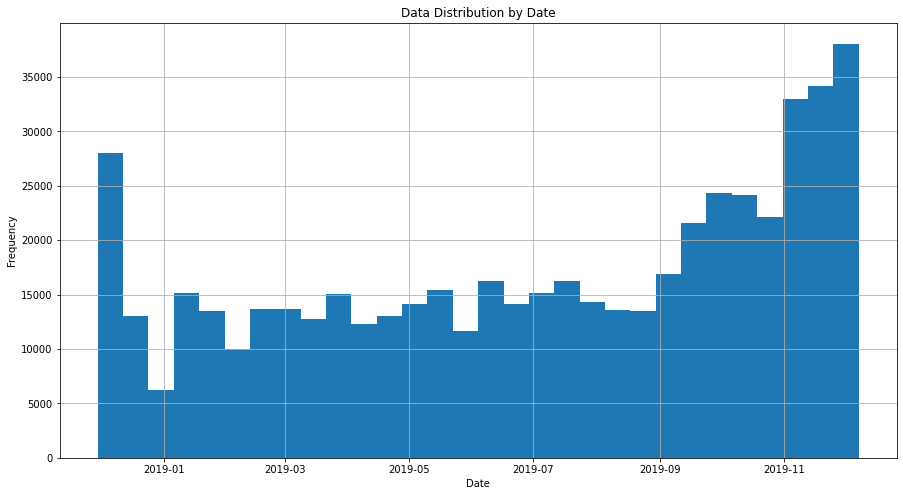

In [121]:
# Checking data destribution by date
data['invoice_date'].hist(bins=30, figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Data Distribution by Date')
plt.show()

- The data distribution from 29 Nov 2018 to 7 Dec 2019 reveals intriguing patterns. 
- The graph exhibits significant spikes towards the end of each year, particularly in late November and early December. 
- These spikes suggest the presence of seasonality or promotional activities during this period. 
- It evokes the enchantment of Christmas "The most wonderful Time of the Year!" 

### Some extra data cleaning

In [122]:
# Displaying data description
data.describe()

,quantity,unit_price,customer_id,order_total
count,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,11437.732164,20.275399
std,156.280031,36.093028,6799.513627,271.693566
min,1.000000,0.001000,0.000000,0.001000
25%,1.000000,1.250000,0.000000,3.900000
50%,4.000000,2.080000,14350.000000,9.920000
75%,11.000000,4.130000,16245.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [123]:
# Looking for abnormal values
quantity_anomalies = data['quantity'].reset_index()
quantity_anomalies.sample()

,index,quantity
58130,60100,10


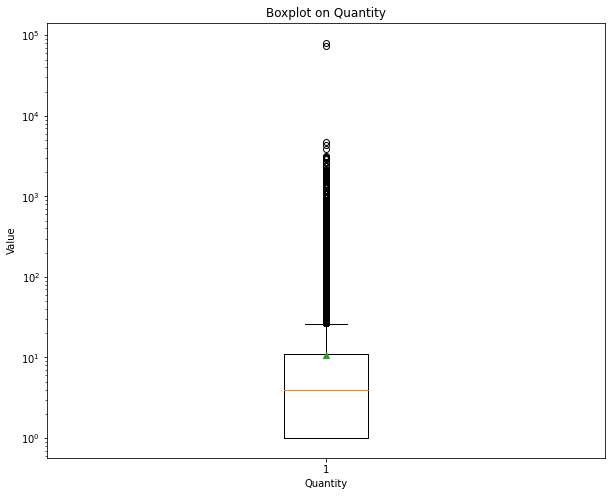

In [124]:
# Plotting the boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(data['quantity'], showmeans=True)
plt.yscale('log')
plt.title('Boxplot on Quantity')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

In [125]:
# Looking for abnormal values in 'quantity' column
data.query('quantity > 5000').sort_values(by = 'quantity', ascending = False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446,168469.6,crafting
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,77183.6,kitchen


In [126]:
# Looking for abnormal values
price_anomalies = data['unit_price'].reset_index()
price_anomalies.sample()

,index,unit_price
384739,397357,2.1


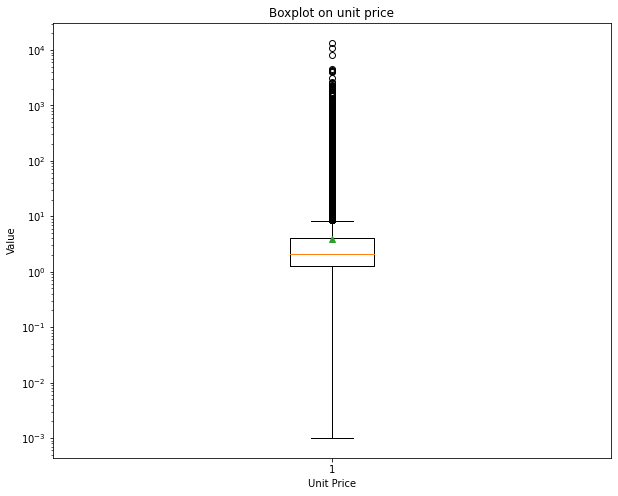

In [127]:
# Plotting the boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(data['unit_price'], showmeans=True)
plt.yscale('log')
plt.title('Boxplot on unit price')
plt.xlabel('Unit Price')
plt.ylabel('Value')
plt.show()

In [128]:
# Looking for abnormal values in 'unit_price' column
data.query('unit_price > 5000').sort_values(by = 'unit_price', ascending = False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category
15017,537632,AMAZONFEE,AMAZON FEE,1,2018-12-05 15:08:00,13541.33,0,13541.33,not_a_product
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,0,11062.06,not_a_product
173382,551697,POST,POSTAGE,1,2019-05-01 13:46:00,8142.75,16029,8142.75,not_a_product


- We have identified five clear anomalies in our data that can be attributed to typographical errors or other technical issues during data entry. 
- Due to the limited number of affected entries and the importance of maintaining data integrity, it is advisable to remove these entries from the dataset. By doing so, we can ensure the overall quality and reliability of the data.

In [129]:
# List of row indexes to remove
indexes_to_drop = [540421, 61619, 15017, 299982, 173382]

# Removing anomalies
data = data.loc[~data.index.isin(indexes_to_drop)].reset_index(drop=True)

### Category Analysis:

   - Analyze the distribution of products across different categories using the `category` column.
   - Calculate the frequency or percentage of products in each category.
   - Visualize the distribution using a pie chart to identify the most and least popular categories.

In [130]:
# Calculating the frequency or percentage of products in each category
category_counts = data['category'].value_counts()
category_percentages = (category_counts / len(data) * 100)
category_percentages.to_frame()

,category
kitchen,23.230572
home_accessories,14.943043
home_storage,9.967364
vintage,9.617755
stationary,6.835558
crafting,6.810219
decoration,6.408788
romantic_stuff,4.483561
non_categorized,3.460837
party_supplies,2.957477


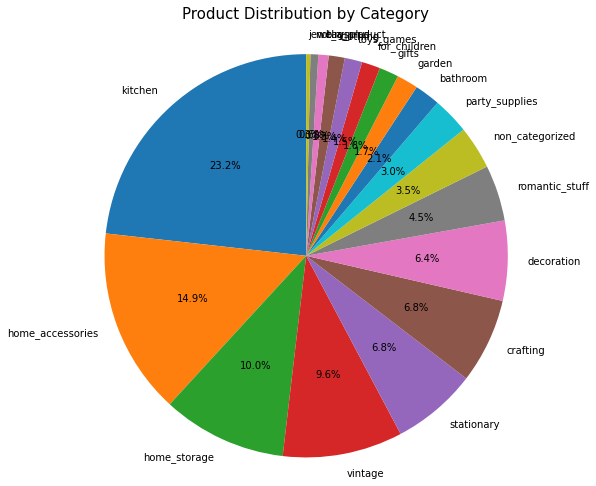

In [131]:
# Creating pie chart for data destribution by categories
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Distribution by Category', fontsize=15, pad=20)  # Adjust the 'pad' parameter to increase the distance between the title and the chart
plt.axis('equal')
plt.show()

Based on the distribution of products across different categories using the category column, we can make the following observations:

- Kitchen Products: The `kitchen` category dominates the product distribution with __23.2%__ of all products. This suggests that a significant portion of the products in the dataset fall under the kitchen category, indicating a strong presence of kitchen-related items.

- Home Accessories: The `home_accessories` category follows with __14.9%__ of all products. This category represents a variety of accessories that are used to decorate or enhance the aesthetics of a home. It indicates that there is a considerable presence of home accessories among the products.

- Home Storage: The `home_storage` category holds __9.96%__ of all products. This category likely includes items used for organizing and storing various household items. The relatively high percentage suggests that home storage solutions are in demand.

These observations provide insights into the distribution and dominance of different product categories in the dataset. It highlights the significance of the kitchen category and the presence of home accessories and home storage products. These findings can be valuable for further analysis and decision-making related to product management and marketing strategies.

### Sales/Product Analysis:

   - Analyze the sales volume and pricing patterns of products.
   - Identify the top-selling categories by sales revenue and quantity.
   - Visualize the sales trends over time using a line chart.

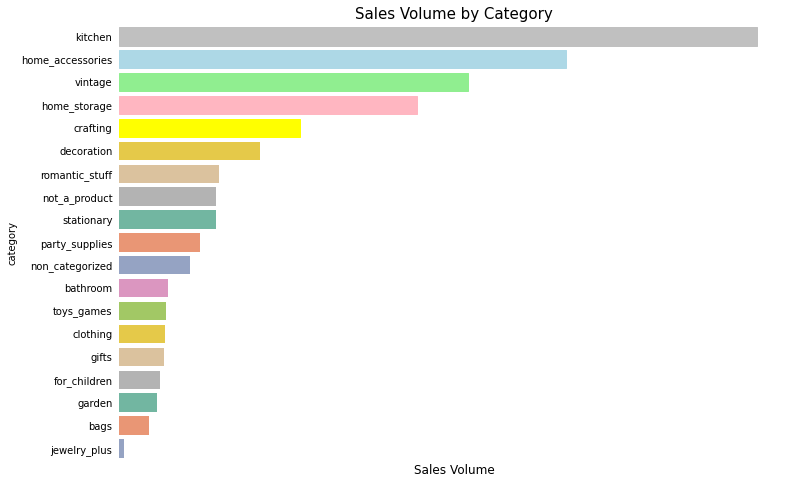

In [132]:
# Calculating the sales volume by category
sales_volume = data.groupby('category')['order_total'].sum().sort_values(ascending=False)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the sales volume using a bar plot
sns.barplot(x=sales_volume, y=sales_volume.index, ax=ax, palette='Set2')

# Customizing the appearance of the bars
bars = ax.patches
colors = ['silver', 'lightblue', 'lightgreen', 'lightpink', 'yellow']  # Add your desired colors here
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Setting the x-axis label
ax.set_xlabel('Sales Volume', fontsize=12)

# Setting the y-axis ticks and labels
ax.set_yticks(range(len(sales_volume)))
ax.set_yticklabels(sales_volume.index)

# Removing the frame and ticks
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)

# Displaying the plot
plt.title('Sales Volume by Category', fontsize=15)
plt.show()

While grouping categories based on total orders, we observe some interesting trends in the distribution:

1. Kitchen and home accessories continue to be the leading categories in terms of total orders.
2. Vintage items have seen an increase in their position, which could be attributed to their potentially higher price range compared to other categories.
3. Stationery, on the other hand, has moved down in the distribution, indicating that products in this category are relatively cheaper.

These observations suggest that the popularity and demand for kitchen and home accessories remain consistent, while the pricing of vintage items and stationery may influence their relative positions in the distribution of total orders.

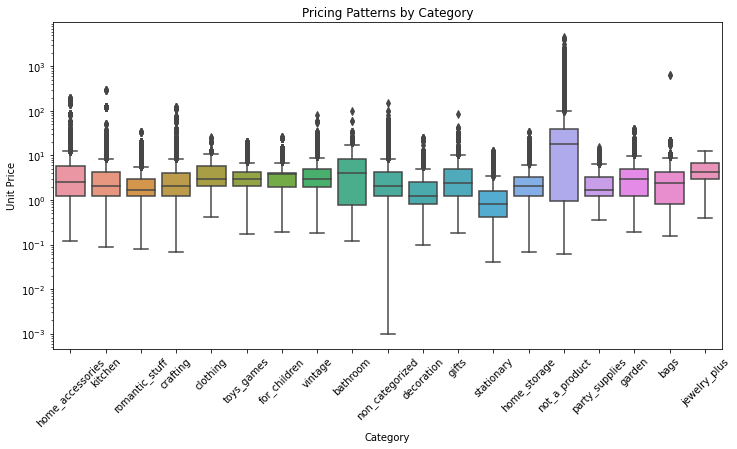

In [133]:
# Pricing Patterns by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='unit_price', data=data)
plt.yscale('log')
plt.title('Pricing Patterns by Category')
plt.xlabel('Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

- `non_categorized` and `not_a_product` categories are clearly not welcomed in this graph

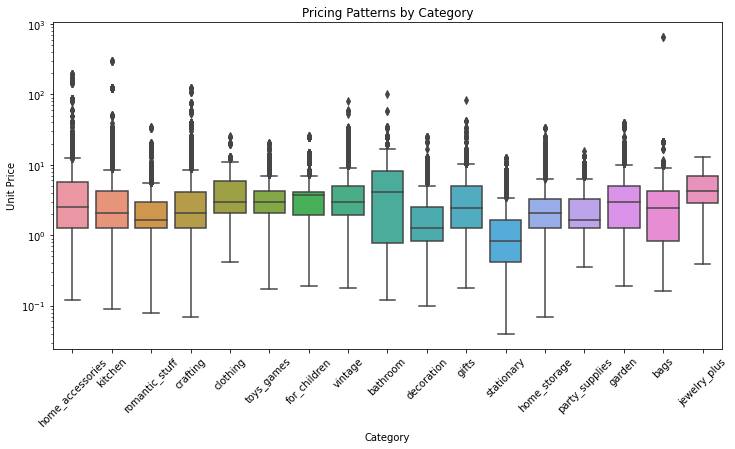

In [134]:
# Filter data excluding "not_a_product" category
filtered_data = data[(data['category'] != 'not_a_product') & (data['category'] != 'non_categorized')]

# Pricing Patterns by category on filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='unit_price', data=filtered_data)
plt.yscale('log')
plt.title('Pricing Patterns by Category')
plt.xlabel('Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

- We have observed that the kitchen products category may lead due to having of a relatively small number of higher price items.
- Additionally, looks like there is a specific dot for "Louis Vuitton" bag within the bags category :)

In [135]:
# Top-Selling Products by Sales Revenue
top_sales_revenue = filtered_data.groupby('description')['order_total'].sum().nlargest(10)
top_sales_revenue

description
REGENCY CAKESTAND 3 TIER              174156.54
WHITE HANGING HEART T-LIGHT HOLDER    106236.72
PARTY BUNTING                          99445.23
JUMBO BAG RED RETROSPOT                94159.81
RABBIT NIGHT LIGHT                     66870.03
PAPER CHAIN KIT 50'S CHRISTMAS         64875.59
ASSORTED COLOUR BIRD ORNAMENT          58927.62
CHILLI LIGHTS                          54096.36
SPOTTY BUNTING                         42513.48
JUMBO BAG PINK POLKADOT                42401.01
Name: order_total, dtype: float64

In [136]:
# Top-Selling Products by Quantity
top_sales_quantity = filtered_data.groupby('description')['quantity'].sum().nlargest(10)
top_sales_quantity

description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
JUMBO BAG RED RETROSPOT               48371
WHITE HANGING HEART T-LIGHT HOLDER    37872
POPCORN HOLDER                        36749
PACK OF 72 RETROSPOT CAKE CASES       36396
ASSORTED COLOUR BIRD ORNAMENT         36362
RABBIT NIGHT LIGHT                    30739
MINI PAINT SET VINTAGE                26633
PACK OF 12 LONDON TISSUES             26119
PACK OF 60 PINK PAISLEY CAKE CASES    24820
Name: quantity, dtype: int64

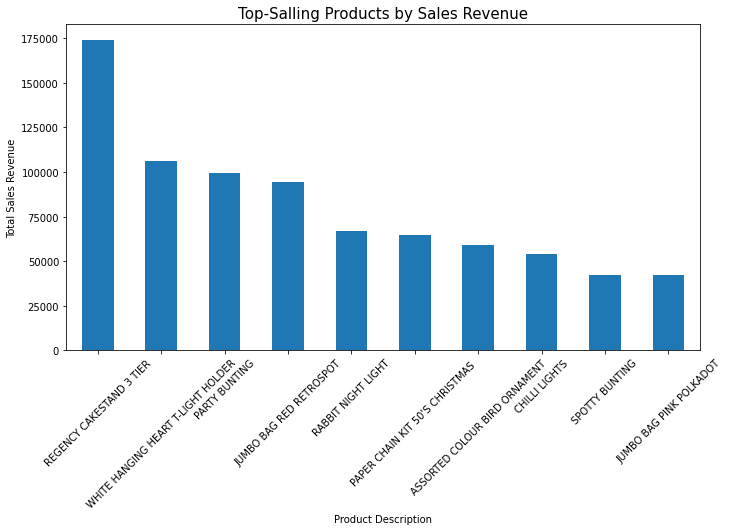

In [137]:
# Plotting barplot
plt.figure(figsize=(25, 6))

# Top-Selling Products by Sales Revenue
plt.subplot(1, 2, 1)
top_sales_revenue.plot(kind='bar')
plt.title('Top-Salling Products by Sales Revenue', fontsize=15)
plt.xlabel('Product Description')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.show()


- top-selling in terms of revenue product is "REGENCY CAKESTAND 3 TIER" and "WHITE HANGING HEART T-LIGHT HOLDER" 
- they might pulled `kitchen` and `home_accessories` to the top

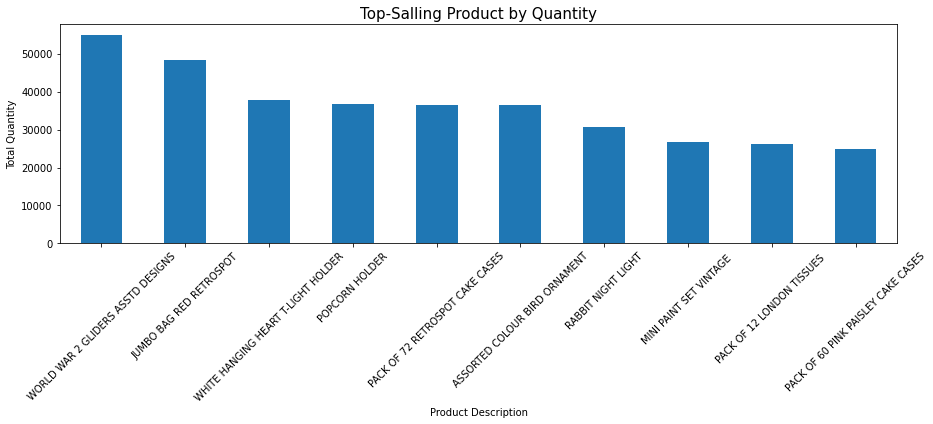

In [138]:
# Plotting barplot
plt.figure(figsize=(25, 6))

# Top-Selling Products by Quantity
plt.subplot(1, 2, 2)
top_sales_quantity.plot(kind='bar')
plt.title('Top-Salling Product by Quantity', fontsize=15)
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- top-salles by popularity are "WORLD WAR 2 GLIDERS ASSTD DESIGNS" and "JUMBO BAG RED RETROSPOT"

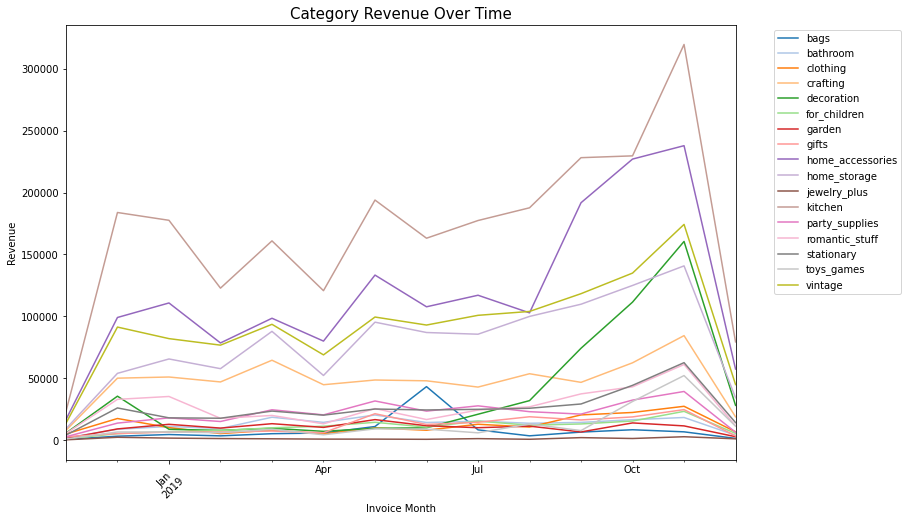

In [139]:
# Visualizing the sales trends over time using a line chart.
# Extracting month from invoice_date
filtered_data['invoice_month'] = filtered_data['invoice_date'].dt.to_period('M')

# Calculating the category revenue over time
category_revenue = filtered_data.groupby(['invoice_month', 'category'])['order_total'].sum().reset_index().pivot_table(
    index='invoice_month',
    columns='category',
    values='order_total',
    fill_value=0)

# Setting the figure size before creating the subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the stacked area chart with different colors for each category
colors = sns.color_palette('tab20', len(category_revenue.columns))
category_revenue.plot(kind='line', color=colors, ax=ax)

# Setting title, legend, and x-y labels
ax.set_title('Category Revenue Over Time', fontsize=15)
ax.set_xlabel('Invoice Month')
ax.set_ylabel('Revenue')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

- The category `kitchen` consistently remains at the top over time, with noticeable spikes in December 2018 and a significant spike in December 2019 (Christmas Holidays discount season).
- Similarly, categories such as `home_accessories`, `vintage`, and `decoration` also exhibit similar patterns of spikes.
- In the `bags` category, there is a single spike observed in June 2019, suggesting a potential increase in demand, possibly indicating the preparation for summer vacation travels (Summer sale promotions). 

### Customer/Product Analysis:

   - Explore the distribution of customers by product categories.
   - Identify the top-spending customers and their preferred product categories.
   - Average purchase by category and month

In [140]:
# Displaying the sample of filtered dataset for further analysis
filtered_data.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
121362,547042,21745,GAOLERS KEYS DECORATIVE GARDEN,1,2019-03-18 11:00:00,8.29,0,8.29,garden,2019-03


In [141]:
# The current stage cleaned dataset will be used for creating PDF presentation and dashboard in Tableau
# ... Performig operations on the DataFrame ...

# Save the DataFrame as a CSV file
filtered_data.to_csv('filtered_data.csv', index=False)

# Provide a download link for the CSV file
from IPython.display import FileLink
FileLink('filtered_data.csv')

/home/jovyan/work/filtered_data.csv

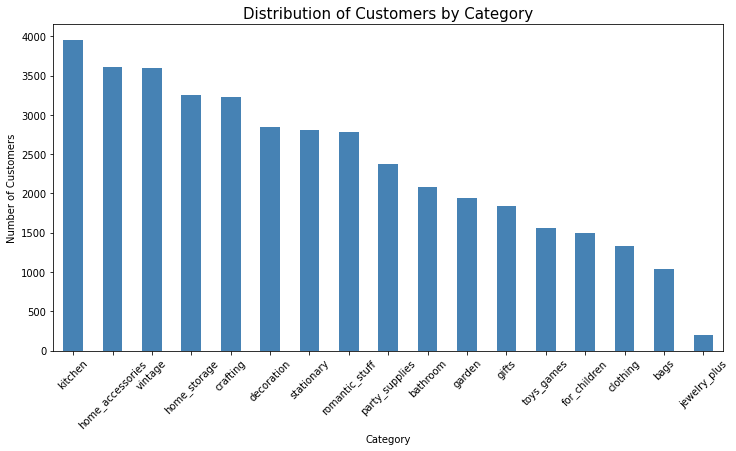

In [142]:
# Creating barplot
plt.figure(figsize=(12, 6))
customer_category_counts = filtered_data.groupby('category')['customer_id'].nunique().sort_values(ascending=False)
customer_category_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Customers by Category', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

- The patterns of leading product categories remain consistent as we examine the distribution among customers.
- The category of `crafting` stands out, nearly matching the popularity of `home_storage`, indicating a strong interest in crafting activities among customers.
- Categories such as `decoration`, `stationary`, and `romantic_stuff` exhibit similar levels of popularity.
- Interestingly, the category of `jewelry` has been completely overlooked by customers, possibly due to the main focus of the e-shop being on other product assortments rather than jewelry.

In [143]:
# Calculating distribution of orders over time
items_order = filtered_data.groupby(by = 'invoice_month').agg({'order_total':'sum'}).reset_index()
items_order

,invoice_month,order_total
0,2018-11,100569.30
1,2018-12,643340.43
2,2019-01,626108.31
3,2019-02,489103.30
4,2019-03,654034.07
5,2019-04,484176.83
6,2019-05,764678.35
7,2019-06,681822.98
8,2019-07,703957.26
9,2019-08,738197.63


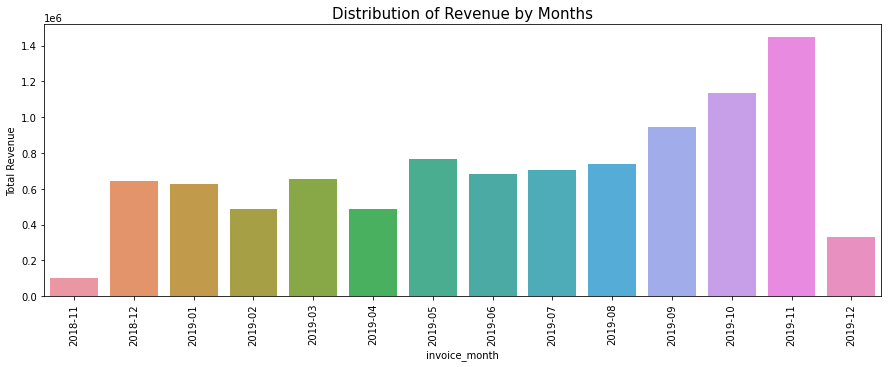

In [144]:
# Creating barplot 
plt.figure(figsize=(15, 5))
sns.barplot(x='invoice_month', y='order_total', data=items_order)
plt.xticks(rotation=90)
plt.title('Distribution of Revenue by Months', fontsize=15)
plt.ylabel('Total Revenue')
plt.show()

- It is important to note that the revenue figures for November 2011 and December 2019 should not be considered as representative, as they do not cover the entire month.
- December 2018 and January 2019 generated nearly equal revenue, indicating a strong start to the new year.
- There were slight spikes in revenue in March 2019 and May 2019, suggesting notable sales events or promotional campaigns during those periods.
- From June 2019 onwards, the revenue shows a consistent upward trend, reaching its peak in November 2019. This can be attributed to the holiday season, including Thanksgiving and Christmas, which traditionally witness higher sales and increased consumer spending.

In [145]:
# Group by customer_id and calculate total spending
customer_spending = filtered_data.groupby('customer_id')['order_total'].sum()

# Sort customers based on spending in descending order
top_spending_customers = customer_spending.sort_values(ascending=False).head(10)

# Iterate through top-spending customers
for customer_id in top_spending_customers.index:
    # Filter data for the current customer
    customer_data = data[data['customer_id'] == customer_id]
    
    # Group by category and calculate total spending
    category_spending = customer_data.groupby('category')['order_total'].sum()
    
    # Get the preferred category with highest spending
    preferred_category = category_spending.idxmax()
    
    # Print the customer and their preferred category
    print(f"Customer ID: {customer_id}, Preferred Category: {preferred_category}")


Customer ID: 0, Preferred Category: kitchen
Customer ID: 14646, Preferred Category: kitchen
Customer ID: 18102, Preferred Category: home_accessories
Customer ID: 17450, Preferred Category: home_accessories
Customer ID: 14911, Preferred Category: kitchen
Customer ID: 12415, Preferred Category: kitchen
Customer ID: 14156, Preferred Category: kitchen
Customer ID: 17511, Preferred Category: kitchen
Customer ID: 16029, Preferred Category: home_accessories
Customer ID: 16684, Preferred Category: kitchen


- The top-spending customer in our dataset remains anonymous as we do not have access to the customer ID.
- However, when looking at the overall top-spending customers, we observe a common preference for purchasing kitchen products and home accessories.

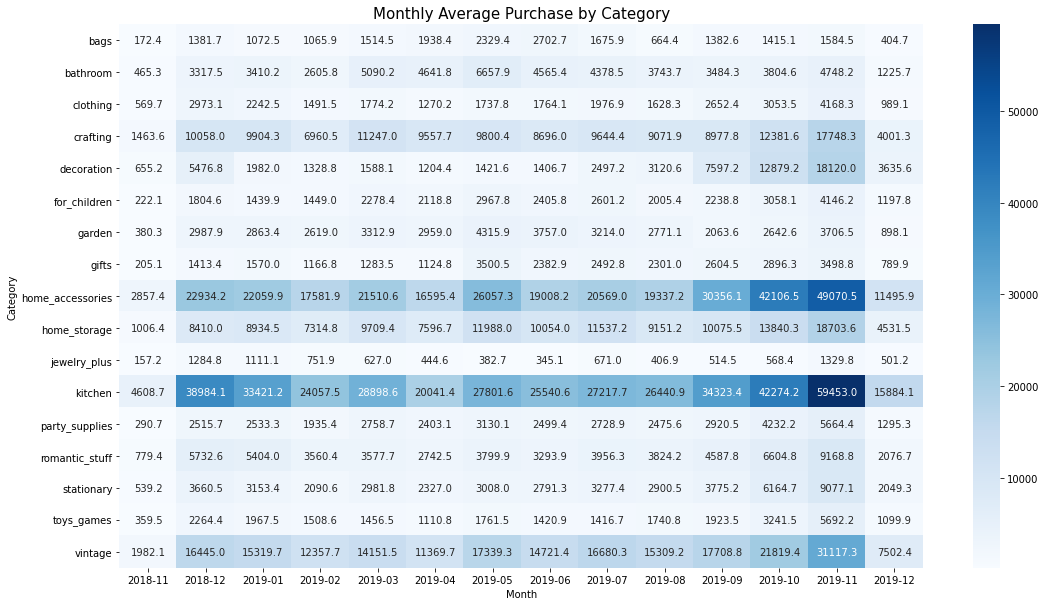

In [146]:
# Calculating an average purchase
purchase_avg = filtered_data.groupby(['category', 'invoice_month'])['unit_price'].sum().reset_index()

# Creating pivot table
purchase_pivot = purchase_avg.pivot_table(index='category', columns='invoice_month', values='unit_price', aggfunc='mean')

#Setting the size
plt.figure(figsize=(18, 10))

# Drawing heatmap
sns.heatmap(purchase_pivot, cmap='Blues', annot=True, fmt='.1f', cbar=True)
plt.title("Monthly Average Purchase by Category", fontsize=15)
plt.xlabel('Month')
plt.ylabel('Category')
plt.show()

- The average purchase graph further validates the trends observed in earlier stages of our analysis.
- Consistently, the top categories that stand out in terms of average purchase amounts are `kitchen`, `home_accessories` and `vintage`.
- Additionally, when examining the seasonal patterns of spending, we can see that the highest expenditure periods occur during the summer and especially winter of 2019. These seasons seem to coincide with increased consumer purchasing behavior.

## Statistical Data Analysis

In [147]:
test_data = filtered_data

In [148]:
test_data.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
316073,565491,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40,2019-09-03 11:41:00,2.55,13881,102.00,decoration,2019-09
480229,578344,20992,JAZZ HEARTS PURSE NOTEBOOK,1,2019-11-22 09:21:00,1.63,0,1.63,stationary,2019-11
33332,539408,22722,SET OF 6 SPICE TINS PANTRY DESIGN,4,2018-12-15 12:56:00,3.95,12720,15.80,home_storage,2018-12
464018,577141,23535,WALL ART BICYCLE SAFETY,4,2019-11-16 09:11:00,5.95,13269,23.80,home_accessories,2019-11
50516,540702,79321,CHILLI LIGHTS,4,2019-01-09 09:58:00,4.95,13491,19.80,home_accessories,2019-01


### Hypothesis:

__The holiday season significantly influences the product range of the top-selling categories.__

___Null hypothesis (H0):___ There is no significant difference in the product range of the top-selling categories between the holiday season and other periods.

___Alternative hypothesis (H1):___ The holiday season leads to a diversification and expansion of the product range in the top-selling categories compared to other periods.

In [149]:
# Defining the start and end dates of the holiday season (Christmas Day of 2018 and two weeks prior, total: 14 days)
holiday_start_date = pd.to_datetime('2018-12-11')
holiday_end_date = pd.to_datetime('2018-12-25')

# Filtering data for holiday_products_basket
holiday_products_basket = test_data.query('invoice_date >= @holiday_start_date and invoice_date <= @holiday_end_date')

# Filtering data for non_holiday_products_basket
non_holiday_start_date = pd.to_datetime('2019-08-01')
non_holiday_end_date = pd.to_datetime('2019-08-14')

# Extracting the non-holiday season data
non_holiday_products_basket = test_data.query(
    'invoice_date >= @non_holiday_start_date and invoice_date <= @non_holiday_end_date')


In [150]:
# Displaying sample of holiday season data 
holiday_products_basket.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
32941,539322,21181,PLEASE ONE PERSON METAL SIGN,2,2018-12-14 19:22:00,2.10,14713,4.20,home_accessories,2018-12
29514,538877,22076,6 RIBBONS EMPIRE,1,2018-12-12 15:29:00,4.21,0,4.21,party_supplies,2018-12
29629,538880,22197,SMALL POPCORN HOLDER,7,2018-12-12 15:52:00,1.66,0,11.62,home_storage,2018-12


In [151]:
# Displaying sample of non_holiday season data 
non_holiday_products_basket.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
286902,562881,16161P,WRAP ENGLISH ROSE,25,2019-08-08 10:57:00,0.42,15632,10.50,garden,2019-08
284427,562615,21931,JUMBO STORAGE BAG SUKI,10,2019-08-06 12:20:00,2.08,16458,20.80,home_storage,2019-08
288097,562951,23242,TREASURE TIN BUFFALO BILL,6,2019-08-09 09:57:00,2.08,14462,12.48,home_storage,2019-08


In [152]:
# Calculating number of ocurrences (range) of the products within each category during Holiday season.
# Group by 'category' and 'description' and count occurrences
holiday_product_counts = holiday_products_basket.groupby(
    ['category', 'description']).size().reset_index(name='count').sort_values(by='count', ascending=False)
holiday_product_counts

,category,description,count
869,home_accessories,WHITE HANGING HEART T-LIGHT HOLDER,89
87,clothing,HAND WARMER BABUSHKA DESIGN,83
2045,vintage,REGENCY CAKESTAND 3 TIER,72
1227,kitchen,CHOCOLATE HOT WATER BOTTLE,68
1487,kitchen,SCOTTIE DOG HOT WATER BOTTLE,68
...,...,...,...
1098,kitchen,5 STRAND GLASS NECKLACE AMETHYST,1
1105,kitchen,75 GREEN FAIRY CAKE CASES,1
1109,kitchen,AMBER GLASS/SILVER BRACELET,1
1114,kitchen,ANTIQUE GLASS PLACE SETTING,1


In [153]:
# Calculating number of ocurrences (range) of the products within each category during non-holiday season.
# Group by 'category' and 'description' and count occurrences
non_holiday_product_counts = non_holiday_products_basket.groupby(
    ['category', 'description']).size().reset_index(name='count').sort_values(by='count', ascending=False)
non_holiday_product_counts

,category,description,count
802,home_accessories,WHITE HANGING HEART T-LIGHT HOLDER,74
1853,vintage,JUMBO BAG RED RETROSPOT,71
480,gifts,SPOTTY BUNTING,70
1275,kitchen,LUNCH BAG SUKI DESIGN,67
1273,kitchen,LUNCH BAG RED RETROSPOT,66
...,...,...,...
1433,kitchen,SWEETHEART WIRE FRUIT BOWL,1
506,home_accessories,BLUE ROSE FABRIC MIRROR,1
1436,kitchen,TEA COSY BLUE STRIPE,1
505,home_accessories,BLUE HEART COMPACT MIRROR,1


In [154]:
# Importing mannwhitney test from stats library
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(holiday_product_counts['count'], non_holiday_product_counts['count'])

# Print the test statistic and p-value
print("Mann-Whitney U test statistic:", statistic)
print("Mann-Whitney U test p-value:", p_value)

# Hypothesis testing
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Null hypothesis: There is no significant difference in product range between holiday season and non-holiday season.")
else:
    print("Alternative hypothesis: There is a significant difference in product range between holiday season and non-holiday season.")


Mann-Whitney U test statistic: 2142665.5
Mann-Whitney U test p-value: 0.035208213086296465
Alternative hypothesis: There is a significant difference in product range between holiday season and non-holiday season.


#### Conclusion for Hypothesis 6.1

We  __reject null hypothesis__, means that there is a significant difference in product range between __holiday season__ and __non-holiday season__.

### Hypothesis:

__The category `vintage` brought the same average revenue in May 2019 as the category `home_storage`.__

___Null hypothesis (H0):___ There is no significant difference in average revenue between the `vintage` and `home_storage` categories.

___Alternative hypothesis (H1):___ The avearge revenue in `vintage` and `home_storage` categories is significantly different.


In [155]:
# Displaying dataset sample to see column names
test_data.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
151674,550183,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,6,2019-04-12 17:58:00,2.95,14105,17.7,kitchen,2019-04


In [156]:
# Setting timeframe for testing
test_start_date = pd.to_datetime('2019-05-01')
test_end_date = pd.to_datetime('2019-05-31')

In [157]:
# Displaying 'vitage' filtered data sample
vintage_data = test_data.query('category == "vintage" and @test_start_date < invoice_date < @test_end_date').reset_index()
vintage_data.sample(5)

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
961,176223,552528,23232,WRAP VINTAGE PETALS DESIGN,25,2019-05-07 16:59:00,0.42,17218,10.50,vintage,2019-05
2253,187885,553556,23082,SET 6 PAPER TABLE LANTERN HEARTS,1,2019-05-15 16:48:00,3.75,17530,3.75,vintage,2019-05
3358,197876,554669,85099B,JUMBO BAG RED RETROSPOT,10,2019-05-23 15:31:00,2.08,15203,20.80,vintage,2019-05
1858,184168,553189,23061,VINTAGE EMBOSSED HEART,6,2019-05-13 13:14:00,1.25,15033,7.50,vintage,2019-05
3893,202604,555234,23202,JUMBO BAG VINTAGE LEAF,10,2019-05-30 12:54:00,2.08,14515,20.80,vintage,2019-05


In [158]:
# Displaying 'home_storage' data sample
home_storage_data = test_data.query('category == "home_storage" and @test_start_date < invoice_date < @test_end_date').reset_index()
home_storage_data.sample(5)

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,order_total,category,invoice_month
3816,197283,554598,22666,RECIPE BOX PANTRY YELLOW DESIGN,2,2019-05-23 11:12:00,2.95,13263,5.90,home_storage,2019-05
3080,191314,553933,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,20,2019-05-18 10:30:00,2.08,15078,41.60,home_storage,2019-05
2055,182599,553058,84971S,SMALL HEART FLOWERS HOOK,3,2019-05-11 10:44:00,0.85,17790,2.55,home_storage,2019-05
2602,187446,553543,22386,JUMBO BAG PINK POLKADOT,1,2019-05-15 15:35:00,4.13,0,4.13,home_storage,2019-05
1265,176940,552631,22556,PLASTERS IN TIN CIRCUS PARADE,12,2019-05-08 12:55:00,1.65,12684,19.80,home_storage,2019-05


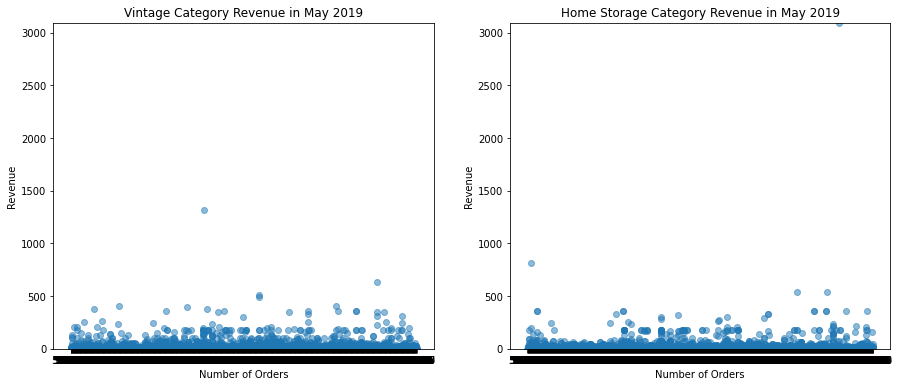

In [159]:
# Visualizing data destribution in the filtered datasets
# Setting figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting scatterplot for crafting category
axes[0].scatter(vintage_data['invoice_no'], vintage_data['order_total'], alpha=0.5)
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Vintage Category Revenue in May 2019')

# Plotting scatterplot for home_storage category
axes[1].scatter(home_storage_data['invoice_no'], home_storage_data['order_total'], alpha=0.5)
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Home Storage Category Revenue in May 2019')

# Setting the same scale for y-axes
axes[0].set_ylim(bottom=0, top=max(vintage_data['order_total'].max(), home_storage_data['order_total'].max()))
axes[1].set_ylim(bottom=0, top=max(vintage_data['order_total'].max(), home_storage_data['order_total'].max()))

# Displaying the plots
plt.show()

The t-test compares the means of the `vintage` and `home_storage` revenue data and calculates the t-statistic and p-value. The null hypothesis assumes that there is no significant difference in revenue between the two categories. If the p-value is less than the chosen significance level (alpha), typically 0.05, we reject the null hypothesis and conclude that there is a significant difference. Otherwise, if the p-value is greater than alpha, we fail to reject the null hypothesis and conclude that there is no significant difference.

In [160]:
# Importing ttest from stats library
from scipy.stats import ttest_ind

# Performing independent t-test
t_statistic, p_value = stats.ttest_ind(vintage_data['order_total'], home_storage_data['order_total'], equal_var=False)

# Print the t-test statistic and p-value
print("T-test statistic:", t_statistic)
print("T-test p-value:", p_value)

# Significance level
alpha = 0.05

# Printing results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in average revenue between the 'vintage' and 'home_storage' categories.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in average revenue between the 'vintage' and 'home_storage' categories.")

T-test statistic: 3.5518925552848812
T-test p-value: 0.00038455088111647844
Reject the null hypothesis.
There is a significant difference in average revenue between the 'vintage' and 'home_storage' categories.


#### Conclusion for Hypothesis 6.2

We  __reject null hypothesis__, means that there is a significant difference in average revenue in May 2019 between `vintage` and `home_storage` categories.

## General Conclusions and Recommendations

***Data Preprocessing:***

1. Column names were renamed for convenience in further analysis.
2. The `Description` column values were converted to lowercase.
3. The `CustomerID` column was converted from float64 to int64 data type.
4. Negative values in the `Quantity` and `UnitPrice` columns were investigated and removed.
5. The `Description` column contained 0.26% missing values, which were removed from the dataset.
6. The `CustomerID` column had approximately 25% missing values, which were replaced with '0'.
7. The `Quantity` and `UnitPrice` columns exhibited a significant right-skew in their data distribution.
8. The dataset contained 5268 duplicated entries, which were removed to ensure data integrity.
9. The __product descriptions were categorized__ using keyword matching, enhancing the dataset with a new categorical column.

These preprocessing steps, including the categorization of product descriptions, improved the quality and structure of the dataset, enabling more accurate analysis and interpretation of the data.

***EDA (Exploratory Data Analysis):***

1. The data exhibits significant spikes towards the end of each year, particularly in late November and early December, suggesting seasonality or promotional activities during the Christmas holiday period.

2. Anomalies, attributed to typographical errors or technical issues, were identified and removed from the dataset to maintain data integrity.

3. The distribution of products across different categories reveals that the __kitchen__ category dominates with 23.2% of all products, followed by __home accessories__ (14.9%) and __home storage__ (10%). These insights provide valuable information for product management and marketing strategies.

4. Analysis of total orders by category shows that __kitchen__ and __home accessories__ consistently lead, with __vintage__ items moving up in the distribution and __stationery__ moving down. ___Pricing___ may influence the relative positions of categories.

5. The __kitchen__ products category stands out due to a relatively small number of higher-priced items.

6. The __top-selling__ products in terms of revenue are "REGENCY CAKESTAND 3 TIER" from __kitchen__ and "WHITE HANGING HEART T-LIGHT HOLDER," from __home_accessories__ contributing to the popularity of the kitchen and home accessories categories.

7. __Time__ series analysis reveals consistent popularity and multiple spikes for categories like __kitchen, home accessories, vintage, and decoration,__ with a single spike in the __bags__ category in June 2019.

8. Among customers, __crafting__ shows popularity similar to __home storage__, while categories like __decoration, stationary,__ and __romantic_stuff__ exhibit similar levels of interest. __Jewelry__ is overlooked, possibly due to the e-shop's focus on other product assortments.

9. __Revenue__ analysis shows consistent upward trends from June 2019, reaching its peak in November 2019, driven by holiday season sales. Notable spikes in revenue are observed in March 2019 and May 2019.

10. The __top-spending customers__ prefer kitchen products and home accessories, consistent with earlier observations. Average purchase amounts also highlight the dominance of kitchen, home accessories, and vintage categories. Increased spending occurs during the summer and winter of 2019.


***Statistics Analysis Conclusions:***

__Hypothesis:__ The holiday season significantly influences the product range of the top-selling categories.

- __Mann-Whitney U test__ was conducted to compare the product range between the holiday season and non-holiday season. 
- The test resulted in a test statistic of 2142665.5 and a p-value of 0.035208213086296465. With a significance level of 0.05, the p-value is less than the significance level, indicating that __we reject the null hypothesis.__ 
- Therefore, there is a significant difference in the product range of the top-selling categories between the holiday season and other periods.


__Hypothesis:__ The category vintage brought the same average revenue in May 2019 as the category home_storage.

- __A t-test__ was performed to compare the average revenue between the vintage and home_storage categories in May 2019. 
- The test resulted in a t-statistic of 3.5518925552848812 and a p-value of 0.00038455088111647844. With a significance level of 0.05, the p-value is less than the significance level, leading us __to reject the null hypothesis.__ 
- Therefore, there is a significant difference in the average revenue between the vintage and home_storage categories in May 2019.

These statistical analyses provide evidence to support the alternative hypotheses. __The holiday season influences the product range of the top-selling categories, and there is a significant difference in the average revenue between the vintage and home_storage categories in May 2019.__


***Based on the research and analysis conducted, here are some recommendations for the e-commerce store:***

1. Product Range Improvements:

   - __Diversify and expand the product range during the `holiday season`:__ The analysis indicates that the holiday season significantly influences the product range of top-selling categories. Consider introducing new and exclusive products or variations to cater to the increased demand during this period.
   
   - __Focus on popular categories:__ Kitchen products, home accessories, and vintage items have shown consistent popularity. Continue to invest in these categories by introducing new and innovative products to meet customer preferences.
   
   - __Explore opportunities in `crafting` and `home_storage` categories:__ The analysis reveals a strong interest in crafting activities and a demand for home storage solutions. Consider expanding the product offerings in these categories to cater to customer needs.
   
   
2. Actionable Recommendations:

   - __Optimize pricing:__ Analyze the pricing strategies for different categories. Consider adjusting prices based on demand, competition, and customer preferences. Utilize pricing techniques such as dynamic pricing or bundling to maximize revenue and attract customers.
   
   - __Seasonal promotions and campaigns:__ Leverage the observed seasonal patterns of increased customer spending. Plan targeted promotions and campaigns during the summer and winter seasons to drive sales. Highlight special offers, discounts, and limited-time deals to create a sense of urgency and encourage customer purchases.
   
   - __Enhance customer experience:__ Focus on providing an excellent customer experience through personalized recommendations, easy navigation, and smooth checkout processes. Implement customer feedback mechanisms and actively address any concerns or issues raised by customers to improve satisfaction and loyalty.


3. Strategies for Business Development:

   - __Market segmentation and targeting:__ Analyze customer demographics, preferences, and purchasing patterns to identify target segments. Tailor marketing efforts and product offerings to specific customer segments, addressing their unique needs and preferences.
   
   - __Collaborations and partnerships:__ Explore collaborations with influencers, bloggers, or complementary brands to expand reach and attract new customers. Partner with relevant organizations or platforms to gain exposure and tap into new customer segments.
   
   - __Data-driven decision-making:__ Continuously monitor and analyze customer data, sales trends, and market insights. Utilize this data to make informed decisions about product range improvements, pricing strategies, and marketing campaigns.